# Industry - View from Inside

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import openpyxl
import re

import warnings

# Suppress from Seaborn
warnings.filterwarnings("ignore", category=FutureWarning)

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [67]:
# Data Cleaning
def substitute_chars(column):
   
    column = column.astype(str).str.lower()
    column = column.str.replace(r'[ .\/,\'"\(\)-]', '_', regex=True)
    column = column.str.replace(r'\s+', '_', regex=True)
    column = column.str.replace(r'_{2,}', '_', regex=True)
    return column


In [68]:
# Data Cleaning
def transform_column_names(column_names):
    return [name.lower().replace(' ', '_') for name in column_names]

# 2011 Data

In [69]:
# Getting Data Sets 
df_11 = pd.read_excel('data/2011.xlsx', sheet_name=0, decimal='.')
df_11.head()


,the year,Class of the facility,The main activity,Isic_3,Secondary activity,Entity_Annawi,Date of the start of production,The property of the facility,Unnamed: 8,capital,...,The assets of the beginning of the year,Outup,Outlife - New_,Building assets,The assets_Sthesting the facility,Additions - improvements,Fad -lost,Outlife,Holding_Sa_ of money,The assets of the end of the year
0,2011,1,1071,1541,NaN,1,2007-01-01 00:00:00,خاص,private,1000,...,8250,0,0,0,0,0,0,0,840,7410
1,2011,1,1071,1541,NaN,1,2005-01-01 00:00:00,خاص,private,1000,...,110,0,1800,0,0,0,0,0,101,1809
2,2011,1,1071,1541,NaN,1,2003-01-01 00:00:00,خاص,private,500,...,1500,0,0,0,0,0,0,0,157,1343
3,2011,1,1071,1541,NaN,1,2000-01-01 00:00:00,خاص,private,2000,...,1520,0,0,0,0,0,0,0,152,1368
4,2011,1,1071,1541,NaN,1,9996-01-01 00:00:00,خاص,private,2000,...,5010,0,0,0,0,0,0,0,501,4509


In [70]:
for col in df_11.columns:
    df_11[col] = substitute_chars(df_11[col])

In [71]:
# Apply the transformation to column names
df_11.columns = transform_column_names(df_11.columns)
df_11.head()

,the_year,class_of_the_facility,the_main_activity,isic_3,secondary_activity,entity_annawi,date_of_the_start_of_production,the_property_of_the_facility,unnamed:_8,capital,...,the_assets_of_the_beginning_of_the_year,outup,outlife_-_new_,building_assets,the_assets_sthesting_the_facility,additions_-_improvements,fad_-lost,outlife,holding_sa__of_money,the_assets_of_the_end_of_the_year
0,2011,1,1071,1541,nan,1,2007_01_01_00:00:00,خاص,private,1000,...,8250,0,0,0,0,0,0,0,840,7410
1,2011,1,1071,1541,nan,1,2005_01_01_00:00:00,خاص,private,1000,...,110,0,1800,0,0,0,0,0,101,1809
2,2011,1,1071,1541,nan,1,2003_01_01_00:00:00,خاص,private,500,...,1500,0,0,0,0,0,0,0,157,1343
3,2011,1,1071,1541,nan,1,2000_01_01_00:00:00,خاص,private,2000,...,1520,0,0,0,0,0,0,0,152,1368
4,2011,1,1071,1541,nan,1,9996_01_01_00:00:00,خاص,private,2000,...,5010,0,0,0,0,0,0,0,501,4509


In [72]:
selected_columns = ['the_year', 'the_main_activity', 'capital', 'foreigners_-_individuals', 'foreigners_-_companies', 'foreigners__government', 
                    'male_salad_workers', 'females_', 'male_worker_owner', 'female_worker_owner', 'persons_and_salaries', 
                    'the_assets_of_the_beginning_of_the_year', 'the_assets_of_the_end_of_the_year']

In [73]:
df_11 = df_11[selected_columns]
df_11.head()

,the_year,the_main_activity,capital,foreigners_-_individuals,foreigners_-_companies,foreigners__government,male_salad_workers,females_,male_worker_owner,female_worker_owner,persons_and_salaries,the_assets_of_the_beginning_of_the_year,the_assets_of_the_end_of_the_year
0,2011,1071,1000,nan,nan,nan,2,0,1,0,6000,8250,7410
1,2011,1071,1000,nan,nan,nan,3,0,1,0,3600,110,1809
2,2011,1071,500,nan,nan,nan,3,0,1,0,7200,1500,1343
3,2011,1071,2000,nan,nan,nan,3,0,0,0,10800,1520,1368
4,2011,1071,2000,nan,nan,nan,4,0,0,0,9600,5010,4509


In [74]:
df_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   the_year                                 2535 non-null   object
 1   the_main_activity                        2535 non-null   object
 2   capital                                  2535 non-null   object
 3   foreigners_-_individuals                 2535 non-null   object
 4   foreigners_-_companies                   2535 non-null   object
 5   foreigners__government                   2535 non-null   object
 6   male_salad_workers                       2535 non-null   object
 7   females_                                 2535 non-null   object
 8   male_worker_owner                        2535 non-null   object
 9   female_worker_owner                      2535 non-null   object
 10  persons_and_salaries                     2535 non-null   obj

# 2015 Data

In [75]:
df_15 = pd.read_excel('data/2015.xlsx', sheet_name=0, decimal='.')
df_15.head()

,the year,Class of the facility,The main activity,Isic_3,Secondary activity,Entity_Annawi,Date of the start of production,The property of the facility,Unnamed: 8,capital,...,The assets of the beginning of the year,Outup,Outlife - New_,Building assets,The assets_Sthesting the facility,Additions - improvements,Fad -lost,Outlife,Holding_Sa_ of money,The assets of the end of the year
0,2015,1,2511,2811,NaN,1,2014-11-01,خاص,private,3000,...,3001,0,0,0,0,0,0,0,360,2641
1,2015,1,3100,3610,NaN,1,2013-01-01,خاص,private,1500,...,7050,0,0,0,0,0,0,0,955,6095
2,2015,1,1629,2029,NaN,1,2014-01-01,خاص,private,5000,...,5140,0,0,0,0,0,0,0,513,4627
3,2015,1,2592,2892,NaN,1,2000-01-01,خاص,private,500,...,4100,0,0,0,0,0,0,0,409,3691
4,2015,1,1410,1810,NaN,1,1987-01-01,خاص,private,500,...,550,0,0,0,0,0,0,0,55,495


In [76]:
for col in df_15.columns:
    df_15[col] = substitute_chars(df_15[col])

In [77]:
df_15.columns = transform_column_names(df_15.columns)
df_15.head()

,the_year,class_of_the_facility,the_main_activity,isic_3,secondary_activity,entity_annawi,date_of_the_start_of_production,the_property_of_the_facility,unnamed:_8,capital,...,the_assets_of_the_beginning_of_the_year,outup,outlife_-_new_,building_assets,the_assets_sthesting_the_facility,additions_-_improvements,fad_-lost,outlife,holding_sa__of_money,the_assets_of_the_end_of_the_year
0,2015,1,2511,2811,nan,1,2014_11_01,خاص,private,3000,...,3001,0,0,0,0,0,0,0,360,2641
1,2015,1,3100,3610,nan,1,2013_01_01,خاص,private,1500,...,7050,0,0,0,0,0,0,0,955,6095
2,2015,1,1629,2029,nan,1,2014_01_01,خاص,private,5000,...,5140,0,0,0,0,0,0,0,513,4627
3,2015,1,2592,2892,nan,1,2000_01_01,خاص,private,500,...,4100,0,0,0,0,0,0,0,409,3691
4,2015,1,1410,1810,nan,1,1987_01_01,خاص,private,500,...,550,0,0,0,0,0,0,0,55,495


In [78]:
df_15 = df_15[selected_columns]
df_15.head()

,the_year,the_main_activity,capital,foreigners_-_individuals,foreigners_-_companies,foreigners__government,male_salad_workers,females_,male_worker_owner,female_worker_owner,persons_and_salaries,the_assets_of_the_beginning_of_the_year,the_assets_of_the_end_of_the_year
0,2015,2511,3000,nan,nan,nan,0,0,1,0,0,3001,2641
1,2015,3100,1500,nan,nan,nan,1,0,1,0,2400,7050,6095
2,2015,1629,5000,nan,nan,nan,2,0,1,0,8640,5140,4627
3,2015,2592,500,nan,nan,nan,0,0,1,0,0,4100,3691
4,2015,1410,500,nan,nan,nan,0,0,1,0,0,550,495


In [79]:
df_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   the_year                                 2410 non-null   object
 1   the_main_activity                        2410 non-null   object
 2   capital                                  2410 non-null   object
 3   foreigners_-_individuals                 2410 non-null   object
 4   foreigners_-_companies                   2410 non-null   object
 5   foreigners__government                   2410 non-null   object
 6   male_salad_workers                       2410 non-null   object
 7   females_                                 2410 non-null   object
 8   male_worker_owner                        2410 non-null   object
 9   female_worker_owner                      2410 non-null   object
 10  persons_and_salaries                     2410 non-null   obj

# 2020 Data

In [80]:
df_20 = pd.read_excel('data/2020.xlsx', decimal='.')
df_20.head()

,the year,Class of the facility,The main activity,Isic_3,Secondary activity,Entity_Annawi,Date of the start of production,The property of the facility,Unnamed: 8,capital,...,Outlife - New_,Building assets,The assets_Sthesting the facility,Additions - improvements,Fad -lost,Outlife,Holding_Sa_ of money,The assets of the end of the year,Status_no,Status_Desc
0,2020,4,620,0,0.000,6.000,1995-05-01 00:00:00,خاص,private,15000000.000,...,62451,0,0,394424,2292510,0,865490,5925096,5,معتمد
1,2020,2,810,0,0.000,1.000,2000-01-01 00:00:00,خاص,private,250000.000,...,0,0,0,0,0,0,130699,716000,5,معتمد
2,2020,1,2395,0,0.000,2.000,2018-01-01 00:00:00,خاص,private,5000.000,...,0,0,0,0,0,0,5100,35400,5,معتمد
3,2020,1,810,0,0.000,NaN,NaN,NaN,#VALUE!,NaN,...,0,0,0,0,0,0,0,0,15,اخرى
4,2020,1,2396,0,0.000,1.000,2019-01-01 00:00:00,خاص,private,2000.000,...,0,0,0,0,0,0,4018,36182,5,معتمد


In [81]:
for col in df_20.columns:
    df_20[col] = substitute_chars(df_20[col])

In [82]:
df_20.columns = transform_column_names(df_20.columns)
df_20.head()

,the_year,class_of_the_facility,the_main_activity,isic_3,secondary_activity,entity_annawi,date_of_the_start_of_production,the_property_of_the_facility,unnamed:_8,capital,...,outlife_-_new_,building_assets,the_assets_sthesting_the_facility,additions_-_improvements,fad_-lost,outlife,holding_sa__of_money,the_assets_of_the_end_of_the_year,status_no,status_desc
0,2020,4,620,0,0_0,6_0,1995_05_01_00:00:00,خاص,private,15000000_0,...,62451,0,0,394424,2292510,0,865490,5925096,5,معتمد
1,2020,2,810,0,0_0,1_0,2000_01_01_00:00:00,خاص,private,250000_0,...,0,0,0,0,0,0,130699,716000,5,معتمد
2,2020,1,2395,0,0_0,2_0,2018_01_01_00:00:00,خاص,private,5000_0,...,0,0,0,0,0,0,5100,35400,5,معتمد
3,2020,1,810,0,0_0,nan,nan,nan,#value!,nan,...,0,0,0,0,0,0,0,0,15,اخرى
4,2020,1,2396,0,0_0,1_0,2019_01_01_00:00:00,خاص,private,2000_0,...,0,0,0,0,0,0,4018,36182,5,معتمد


In [83]:
df_20 = df_20[selected_columns]
df_20.head()

,the_year,the_main_activity,capital,foreigners_-_individuals,foreigners_-_companies,foreigners__government,male_salad_workers,females_,male_worker_owner,female_worker_owner,persons_and_salaries,the_assets_of_the_beginning_of_the_year,the_assets_of_the_end_of_the_year
0,2020,620,15000000_0,0_0,0_0,0_0,150,43,0,0,2491925,8626221,5925096
1,2020,810,250000_0,0_0,0_0,0_0,5,1,0,0,21000,846699,716000
2,2020,2395,5000_0,0_0,0_0,0_0,2,0,1,0,8400,40500,35400
3,2020,810,nan,nan,nan,nan,0,0,0,0,0,0,0
4,2020,2396,2000_0,0_0,0_0,0_0,3,0,1,0,10800,40200,36182


In [84]:
df_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2573 entries, 0 to 2572
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   the_year                                 2573 non-null   object
 1   the_main_activity                        2573 non-null   object
 2   capital                                  2573 non-null   object
 3   foreigners_-_individuals                 2573 non-null   object
 4   foreigners_-_companies                   2573 non-null   object
 5   foreigners__government                   2573 non-null   object
 6   male_salad_workers                       2573 non-null   object
 7   females_                                 2573 non-null   object
 8   male_worker_owner                        2573 non-null   object
 9   female_worker_owner                      2573 non-null   object
 10  persons_and_salaries                     2573 non-null   obj

# Combined Data

In [85]:
dataframes = [df_11, df_15, df_20]

# Concatenate the dataframes vertically
df_industry = pd.concat(dataframes, axis=0)

In [86]:
df_industry.head()

,the_year,the_main_activity,capital,foreigners_-_individuals,foreigners_-_companies,foreigners__government,male_salad_workers,females_,male_worker_owner,female_worker_owner,persons_and_salaries,the_assets_of_the_beginning_of_the_year,the_assets_of_the_end_of_the_year
0,2011,1071,1000,nan,nan,nan,2,0,1,0,6000,8250,7410
1,2011,1071,1000,nan,nan,nan,3,0,1,0,3600,110,1809
2,2011,1071,500,nan,nan,nan,3,0,1,0,7200,1500,1343
3,2011,1071,2000,nan,nan,nan,3,0,0,0,10800,1520,1368
4,2011,1071,2000,nan,nan,nan,4,0,0,0,9600,5010,4509


In [87]:
print(df_industry['the_main_activity'].max())

899


In [88]:
df_industry.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7518 entries, 0 to 2572
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   the_year                                 7518 non-null   object
 1   the_main_activity                        7518 non-null   object
 2   capital                                  7518 non-null   object
 3   foreigners_-_individuals                 7518 non-null   object
 4   foreigners_-_companies                   7518 non-null   object
 5   foreigners__government                   7518 non-null   object
 6   male_salad_workers                       7518 non-null   object
 7   females_                                 7518 non-null   object
 8   male_worker_owner                        7518 non-null   object
 9   female_worker_owner                      7518 non-null   object
 10  persons_and_salaries                     7518 non-null   object
 

In [89]:
float_columns = ['capital', 'foreigners_-_individuals', 'foreigners_-_companies', 'foreigners__government', 
                    'male_salad_workers', 'females_', 'male_worker_owner', 'female_worker_owner', 'persons_and_salaries', 
                    'the_assets_of_the_beginning_of_the_year', 'the_assets_of_the_end_of_the_year']

# Convert the specified columns to float
df_industry[float_columns] = df_industry[float_columns].astype(float)

# Convert 'the_year' column to integers
df_industry['the_year'] = df_industry['the_year'].astype(int)
df_industry['the_main_activity'] = df_industry['the_main_activity'].astype(int)


In [90]:
# Create a new column 'employment' in df_11_15 as the sum of 'male_salad_workers' and 'females_'
df_industry['employment'] = df_industry['male_salad_workers'] + df_industry['females_']
df_industry['employment'] = df_industry['employment'].astype(int)
df_industry.head()

,the_year,the_main_activity,capital,foreigners_-_individuals,foreigners_-_companies,foreigners__government,male_salad_workers,females_,male_worker_owner,female_worker_owner,persons_and_salaries,the_assets_of_the_beginning_of_the_year,the_assets_of_the_end_of_the_year,employment
0,2011,1071,1000.000,NaN,NaN,NaN,2.000,0.000,1.000,0.000,6000.000,8250.000,7410.000,2
1,2011,1071,1000.000,NaN,NaN,NaN,3.000,0.000,1.000,0.000,3600.000,110.000,1809.000,3
2,2011,1071,500.000,NaN,NaN,NaN,3.000,0.000,1.000,0.000,7200.000,1500.000,1343.000,3
3,2011,1071,2000.000,NaN,NaN,NaN,3.000,0.000,0.000,0.000,10800.000,1520.000,1368.000,3
4,2011,1071,2000.000,NaN,NaN,NaN,4.000,0.000,0.000,0.000,9600.000,5010.000,4509.000,4


In [91]:
def assign_sector(value):
    if value < 1000:
        return 'B'
    elif 1001 <= value <= 3321:
        return 'C'
    else:
        return 'D_and_E'


df_industry['sector'] = df_industry['the_main_activity'].apply(assign_sector)


In [92]:
df_industry.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7518 entries, 0 to 2572
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   the_year                                 7518 non-null   int64  
 1   the_main_activity                        7518 non-null   int64  
 2   capital                                  7029 non-null   float64
 3   foreigners_-_individuals                 2142 non-null   float64
 4   foreigners_-_companies                   2091 non-null   float64
 5   foreigners__government                   2091 non-null   float64
 6   male_salad_workers                       7518 non-null   float64
 7   females_                                 7518 non-null   float64
 8   male_worker_owner                        7518 non-null   float64
 9   female_worker_owner                      7518 non-null   float64
 10  persons_and_salaries                     7518 non-nul

# ISIC Rev. 4

Section B - Mining and quarrying

Section C - Manufacturing

Section D_and_E - Electricity, gas, steam, air conditioning supply and Water supply; sewerage, waste management and remediation activities

In [93]:
# Number of firms in each sector in the sample
sector_counts = df_industry['sector'].value_counts()
print(sector_counts)

sector
C          7369
D_and_E      86
B            63
Name: count, dtype: int64


In [94]:
# Total employment in each sector in the sample
sector_sum = df_industry.groupby('sector')['employment'].sum()
print(sector_sum)

sector
B           19192
C          282475
D_and_E     26173
Name: employment, dtype: int64


In [95]:
# Total number of firms by year and sector in the sample
result = df_industry.groupby(['the_year', 'sector']).size().reset_index(name='total_rows')
print(result)

   the_year   sector  total_rows
0      2011        B          25
1      2011        C        2481
2      2011  D_and_E          29
3      2015        B          13
4      2015        C        2380
5      2015  D_and_E          17
6      2020        B          25
7      2020        C        2508
8      2020  D_and_E          40


In [96]:
# Number of entries with zero employment in the sample
result_zero_empl = df_industry[df_industry['employment'] == 0].groupby(['the_year', 'sector']).size().reset_index(name='total_rows_with_zero_employment')
print(result_zero_empl)

   the_year   sector  total_rows_with_zero_employment
0      2011        C                              440
1      2011  D_and_E                                1
2      2015        C                              460
3      2020        B                                6
4      2020        C                              861
5      2020  D_and_E                               16


In [97]:
# Firm distribution across employment bins in the sample
def calculate_firms_by_category(df, year, sec):
    df_filtered = df[(df['the_year'] == year) & (df['sector'] == sec)].copy()  # Create a copy of the subset

    bins = [0, 4, 9, 19, df_filtered['employment'].max()]
    labels = ['1-4', '5-9', '10-19', '>20']
    df_filtered['employment_category'] = pd.cut(df_filtered['employment'], bins=bins, labels=labels)
    result_df = df_filtered.groupby('employment_category').size().reset_index(name='number_of_firms')
    
    return result_df

# Calculate the number of firms for each year and 2digit value
result_2011_B = calculate_firms_by_category(df_industry, 2011, 'B')
result_2011_C = calculate_firms_by_category(df_industry, 2011, 'C')
result_2011_D_and_E = calculate_firms_by_category(df_industry, 2011, 'D_and_E')

result_2015_B = calculate_firms_by_category(df_industry, 2015, 'B')
result_2015_C = calculate_firms_by_category(df_industry, 2015, 'C')
result_2015_D_and_E = calculate_firms_by_category(df_industry, 2015, 'D_and_E')

result_2020_B = calculate_firms_by_category(df_industry, 2020, 'B')
result_2020_C = calculate_firms_by_category(df_industry, 2020, 'C')
result_2020_D_and_E = calculate_firms_by_category(df_industry, 2020, 'D_and_E')


In [98]:
# Distribution of firms in the sample - 2011
print("2011, sector=B:")
print(result_2011_B)
print("\n2011, sector=C:")
print(result_2011_C)
print("\n2011, sector=D_and_E:")
print(result_2011_D_and_E)


2011, sector=B:
  employment_category  number_of_firms
0                 1-4                9
1                 5-9                3
2               10-19                4
3                 >20                9

2011, sector=C:
  employment_category  number_of_firms
0                 1-4             1159
1                 5-9              198
2               10-19              165
3                 >20              519

2011, sector=D_and_E:
  employment_category  number_of_firms
0                 1-4               16
1                 5-9                3
2               10-19                3
3                 >20                6


In [99]:
# Distribution of firms in the sample - 2015
print("2015, sector=B:")
print(result_2015_B)
print("\n2015, sector=C:")
print(result_2015_C)
print("\n2015, sector=D_and_E:")
print(result_2015_D_and_E)


2015, sector=B:
  employment_category  number_of_firms
0                 1-4                3
1                 5-9                5
2               10-19                0
3                 >20                5

2015, sector=C:
  employment_category  number_of_firms
0                 1-4             1162
1                 5-9              161
2               10-19              153
3                 >20              444

2015, sector=D_and_E:
  employment_category  number_of_firms
0                 1-4                7
1                 5-9                1
2               10-19                3
3                 >20                6


In [100]:
# Distribution of firms in the sample - 2020
print("2020, sector=B:")
print(result_2020_B)
print("\n2020, sector=C:")
print(result_2020_C)
print("\n2020, sector=D_and_E:")
print(result_2020_D_and_E)


2020, sector=B:
  employment_category  number_of_firms
0                 1-4                4
1                 5-9                3
2               10-19                2
3                 >20               10

2020, sector=C:
  employment_category  number_of_firms
0                 1-4              644
1                 5-9              138
2               10-19              158
3                 >20              707

2020, sector=D_and_E:
  employment_category  number_of_firms
0                 1-4                5
1                 5-9                4
2               10-19                3
3                 >20               12


### Firm distribution in the population 

For 2011 and 2016:

Sector B: 1-4: 18 | 5-9: 44 | 10-19: 12 | >20: 20

Sector C: 1-4: 18897 | 5-9: 1876 | 10-19: 651 | >20: 809

Sector D_and_E: 1-4: 33 | 5-9: 10 | 10-19: 4 | >20: 7

For 2020:

Sector B: 1-4: 47 | 5-9: 30 | 10-19: 8 | >20: 20

Sector C: 1-4: 17725 | 5-9: 1977 | 10-19: 685 | >20: 1103

Sector D_and_E: 1-4: 45 | 5-9: 30 | 10-19: 12 | >20: 17

Note: In 2011 cencus data we only have [5-19] bin. We applied 2018 division of firms between [5-9] and [10-19] bins to 2011 [5-19] bin.


# From Sample to Population

Inverse Probability Weighting (IPW)

We apply IPW to go from sample to population as some firms by employment categories are under-represented. With this method, we correct for sampling underrepresentation.

In short, IPW involves two main steps. First, the probability—or propensity—of being exposed, given an individual's characteristics, is calculated. 
This is also called the propensity score. Second, weights for each individual are calculated as the inverse of the probability of receiving his/her actual exposure level.

# 2011

In [101]:
def calculate_weight_11(row):
    year = row['the_year']
    sector = row['sector']
    employment = row['employment']
    
    weight_rules = {
        (2011, 'B'): {
            pd.Interval(0, 4): 18/9,
            pd.Interval(4, 9): 44/3,
            pd.Interval(9, 19): 12/4,
            pd.Interval(19, df_industry['employment'].max()): 20/9
        },
        (2011, 'C'): {
            pd.Interval(0, 4): 18897/1159,
            pd.Interval(4, 9): 1876/198,
            pd.Interval(9, 19): 651/165,
            pd.Interval(19, df_industry['employment'].max()): 809/519
        },
        (2011, 'D_and_E'): {
            pd.Interval(0, 4): 33/16,
            pd.Interval(4, 9): 10/3,
            pd.Interval(9, 19): 4/3,
            pd.Interval(19, df_industry['employment'].max()): 7/6
        }
    }
    
    if (year, sector) in weight_rules:
        for interval, weight in weight_rules[(year, sector)].items():
            if employment in interval:
                return weight
    
    return None  

df_industry['weight_2011'] = df_industry.apply(calculate_weight_11, axis=1)


In [102]:
# Check
df_industry_2011 = df_industry[df_industry['the_year'] == 2011]
df_industry_2011.head()

,the_year,the_main_activity,capital,foreigners_-_individuals,foreigners_-_companies,foreigners__government,male_salad_workers,females_,male_worker_owner,female_worker_owner,persons_and_salaries,the_assets_of_the_beginning_of_the_year,the_assets_of_the_end_of_the_year,employment,sector,weight_2011
0,2011,1071,1000.000,NaN,NaN,NaN,2.000,0.000,1.000,0.000,6000.000,8250.000,7410.000,2,C,16.305
1,2011,1071,1000.000,NaN,NaN,NaN,3.000,0.000,1.000,0.000,3600.000,110.000,1809.000,3,C,16.305
2,2011,1071,500.000,NaN,NaN,NaN,3.000,0.000,1.000,0.000,7200.000,1500.000,1343.000,3,C,16.305
3,2011,1071,2000.000,NaN,NaN,NaN,3.000,0.000,0.000,0.000,10800.000,1520.000,1368.000,3,C,16.305
4,2011,1071,2000.000,NaN,NaN,NaN,4.000,0.000,0.000,0.000,9600.000,5010.000,4509.000,4,C,16.305


# 2015

In [103]:
def calculate_weight_15(row):
    year = row['the_year']
    sector = row['sector']
    employment = row['employment']
    
    weight_rules = {
        (2015, 'B'): {
            pd.Interval(0, 4): 18/3,
            pd.Interval(4, 9): 44/5,
            pd.Interval(9, 19): 1,
            pd.Interval(19, df_industry['employment'].max()): 20/5
        },
        (2015, 'C'): {
            pd.Interval(0, 4): 18897/1162,
            pd.Interval(4, 9): 1876/161,
            pd.Interval(9, 19): 651/153,
            pd.Interval(19, df_industry['employment'].max()): 809/444
        },
        (2015, 'D_and_E'): {
            pd.Interval(0, 4): 33/7,
            pd.Interval(4, 9): 10/1,
            pd.Interval(9, 19): 4/3,
            pd.Interval(19, df_industry['employment'].max()): 7/6
        }
    }
    
    if (year, sector) in weight_rules:
        for interval, weight in weight_rules[(year, sector)].items():
            if employment in interval:
                return weight
    
    return None  

df_industry['weight_2015'] = df_industry.apply(calculate_weight_15, axis=1)


In [104]:
# Check
df_industry_2015 = df_industry[df_industry['the_year'] == 2015]
df_industry_2015.head()

,the_year,the_main_activity,capital,foreigners_-_individuals,foreigners_-_companies,foreigners__government,male_salad_workers,females_,male_worker_owner,female_worker_owner,persons_and_salaries,the_assets_of_the_beginning_of_the_year,the_assets_of_the_end_of_the_year,employment,sector,weight_2011,weight_2015
0,2015,2511,3000.000,NaN,NaN,NaN,0.000,0.000,1.000,0.000,0.000,3001.000,2641.000,0,C,NaN,NaN
1,2015,3100,1500.000,NaN,NaN,NaN,1.000,0.000,1.000,0.000,2400.000,7050.000,6095.000,1,C,NaN,16.262
2,2015,1629,5000.000,NaN,NaN,NaN,2.000,0.000,1.000,0.000,8640.000,5140.000,4627.000,2,C,NaN,16.262
3,2015,2592,500.000,NaN,NaN,NaN,0.000,0.000,1.000,0.000,0.000,4100.000,3691.000,0,C,NaN,NaN
4,2015,1410,500.000,NaN,NaN,NaN,0.000,0.000,1.000,0.000,0.000,550.000,495.000,0,C,NaN,NaN


# 2020

In [105]:
def calculate_weight_20(row):
    year = row['the_year']
    sector = row['sector']
    employment = row['employment']
    
    weight_rules = {
        (2020, 'B'): {
            pd.Interval(0, 4): 47/4,
            pd.Interval(4, 9): 30/3,
            pd.Interval(9, 19): 8/2,
            pd.Interval(19, df_industry['employment'].max()): 20/10
        },
        (2020, 'C'): {
            pd.Interval(0, 4): 17725/644,
            pd.Interval(4, 9): 1977/138,
            pd.Interval(9, 19): 685/158,
            pd.Interval(19, df_industry['employment'].max()): 1103/707
        },
        (2020, 'D_and_E'): {
            pd.Interval(0, 4): 45/5,
            pd.Interval(4, 9): 30/4,
            pd.Interval(9, 19): 12/3,
            pd.Interval(19, df_industry['employment'].max()): 17/12
        }
    }
    
    if (year, sector) in weight_rules:
        for interval, weight in weight_rules[(year, sector)].items():
            if employment in interval:
                return weight
    
    return None  

df_industry['weight_2020'] = df_industry.apply(calculate_weight_20, axis=1)


In [106]:
# Check
df_industry_2020 = df_industry[df_industry['the_year'] == 2020]
df_industry_2020.head()

,the_year,the_main_activity,capital,foreigners_-_individuals,foreigners_-_companies,foreigners__government,male_salad_workers,females_,male_worker_owner,female_worker_owner,persons_and_salaries,the_assets_of_the_beginning_of_the_year,the_assets_of_the_end_of_the_year,employment,sector,weight_2011,weight_2015,weight_2020
0,2020,620,150000000.000,0.000,0.000,0.000,150.000,43.000,0.000,0.000,2491925.000,8626221.000,5925096.000,193,B,NaN,NaN,2.000
1,2020,810,2500000.000,0.000,0.000,0.000,5.000,1.000,0.000,0.000,21000.000,846699.000,716000.000,6,B,NaN,NaN,10.000
2,2020,2395,50000.000,0.000,0.000,0.000,2.000,0.000,1.000,0.000,8400.000,40500.000,35400.000,2,C,NaN,NaN,27.523
3,2020,810,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,B,NaN,NaN,NaN
4,2020,2396,20000.000,0.000,0.000,0.000,3.000,0.000,1.000,0.000,10800.000,40200.000,36182.000,3,C,NaN,NaN,27.523


In [107]:
def calculate_weight(row):
    weights = [row['weight_2011'], row['weight_2015'], row['weight_2020']]
    
    for weight in weights:
        if not pd.isna(weight):
            return weight
    
    return 0


df_industry['weight'] = df_industry.apply(calculate_weight, axis=1)
df_industry.head()

,the_year,the_main_activity,capital,foreigners_-_individuals,foreigners_-_companies,foreigners__government,male_salad_workers,females_,male_worker_owner,female_worker_owner,persons_and_salaries,the_assets_of_the_beginning_of_the_year,the_assets_of_the_end_of_the_year,employment,sector,weight_2011,weight_2015,weight_2020,weight
0,2011,1071,1000.000,NaN,NaN,NaN,2.000,0.000,1.000,0.000,6000.000,8250.000,7410.000,2,C,16.305,NaN,NaN,16.305
1,2011,1071,1000.000,NaN,NaN,NaN,3.000,0.000,1.000,0.000,3600.000,110.000,1809.000,3,C,16.305,NaN,NaN,16.305
2,2011,1071,500.000,NaN,NaN,NaN,3.000,0.000,1.000,0.000,7200.000,1500.000,1343.000,3,C,16.305,NaN,NaN,16.305
3,2011,1071,2000.000,NaN,NaN,NaN,3.000,0.000,0.000,0.000,10800.000,1520.000,1368.000,3,C,16.305,NaN,NaN,16.305
4,2011,1071,2000.000,NaN,NaN,NaN,4.000,0.000,0.000,0.000,9600.000,5010.000,4509.000,4,C,16.305,NaN,NaN,16.305


# Analysis

In [108]:
# salaries
df_industry['salary'] = df_industry['persons_and_salaries'] / df_industry['employment']

In [109]:
# Create bins for 'employment'
bins = [0, 4, 9, 19, float('inf')]
labels = ['1-4', '5-9', '10-19', '>20']
df_industry['employment_bins'] = pd.cut(df_industry['employment'], bins=bins, labels=labels)

# Group by 'the_year', '2digit', and 'employment_bins' and calculate average productivity
average_productivity_by_year_digit_bins = df_industry.groupby(['the_year', 'sector', 'employment_bins'])['salary'].mean().reset_index()
average_productivity_by_year_digit_bins.head()

,the_year,sector,employment_bins,salary
0,2011,B,1-4,3661.667
1,2011,B,5-9,2240.000
2,2011,B,10-19,5129.114
3,2011,B,>20,9335.444
4,2011,C,1-4,2744.980


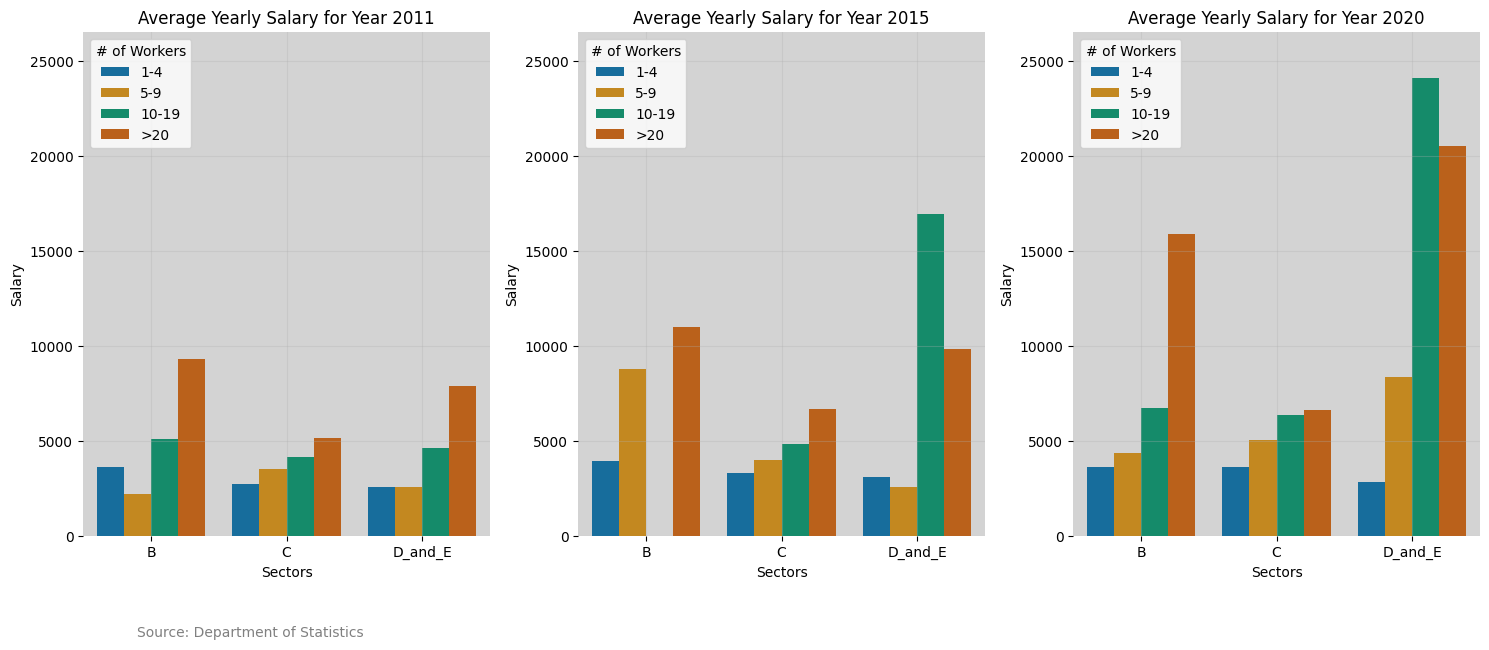

In [110]:
# Average Salaries
years = average_productivity_by_year_digit_bins['the_year'].unique()
fig, axes = plt.subplots(1, len(years), figsize=(15, 6))


max_value = 0


for i, year in enumerate(years):
    ax = axes[i]

    year_data = average_productivity_by_year_digit_bins[average_productivity_by_year_digit_bins['the_year'] == year]
    

    max_year_value = year_data['salary'].max()
    
    ax.set_ylim(0, max_year_value * 1.1)
    
    if max_year_value > max_value:
        max_value = max_year_value
    
    sns.barplot(data=year_data, x='sector', y='salary', hue='employment_bins', palette='colorblind', ax=ax)
    
    ax.set_xlabel('Sectors')
    ax.set_ylabel('Salary')
    ax.set_title(f'Average Yearly Salary for Year {year}')
    
    ax.legend(title='# of Workers', loc='upper left')
    
    ax.set_xticklabels(year_data['sector'].unique(), rotation=0)
    
    ax.set_facecolor('lightgray')
    
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    ax.grid(alpha=0.3)

for ax in axes:
    ax.set_ylim(0, max_value * 1.1)


plt.tight_layout()
source_text = 'Source: Department of Statistics'
plt.text(-2.3, -0.2, source_text, transform=ax.transAxes, fontsize=10, color='gray', ha='left')


plt.show()


# The end of year Assets per Worker

In [111]:
largest_assets = df_industry.nlargest(10, 'the_assets_of_the_end_of_the_year')
largest_assets.head()

,the_year,the_main_activity,capital,foreigners_-_individuals,foreigners_-_companies,foreigners__government,male_salad_workers,females_,male_worker_owner,female_worker_owner,...,the_assets_of_the_beginning_of_the_year,the_assets_of_the_end_of_the_year,employment,sector,weight_2011,weight_2015,weight_2020,weight,salary,employment_bins
684,2020,1410,7100000.000,1000.000,0.000,0.000,1200.000,1800.000,0.000,0.000,...,3478451.000,16749311779.000,3000,C,NaN,NaN,1.560,1.560,3368.973,>20
1768,2020,2410,321651760.000,0.000,0.000,0.000,57.000,5.000,0.000,0.000,...,13472204.000,1624406780.000,62,C,NaN,NaN,1.560,1.560,10729.839,>20
2386,2020,3510,2300000000.000,0.000,0.000,0.000,1111.000,162.000,0.000,0.000,...,623505368.000,624428900.000,1273,D_and_E,NaN,NaN,1.417,1.417,14828.683,>20
1343,2015,3510,230000000.000,NaN,NaN,NaN,1223.000,189.000,0.000,0.000,...,496977091.000,504016324.000,1412,D_and_E,NaN,1.167,NaN,1.167,12309.431,>20
2209,2011,3510,230000000.000,NaN,NaN,NaN,1138.000,199.000,0.000,0.000,...,478558393.000,498832489.000,1337,D_and_E,1.167,NaN,NaN,1.167,7107.627,>20


In [112]:
df_industry['assets_per_worker'] = df_industry['the_assets_of_the_end_of_the_year'] / df_industry['employment']


In [113]:
average_asset_per_worker = df_industry.groupby(['the_year', 'sector', 'employment_bins'])['assets_per_worker'].mean().reset_index()
average_asset_per_worker.head(10)

,the_year,sector,employment_bins,assets_per_worker
0,2011,B,1-4,29541.213
1,2011,B,5-9,12512.724
2,2011,B,10-19,34191.566
3,2011,B,>20,76651.455
4,2011,C,1-4,5989.025
5,2011,C,5-9,14892.683
6,2011,C,10-19,15869.551
7,2011,C,>20,27056.773
8,2011,D_and_E,1-4,11266.510
9,2011,D_and_E,5-9,9479.202


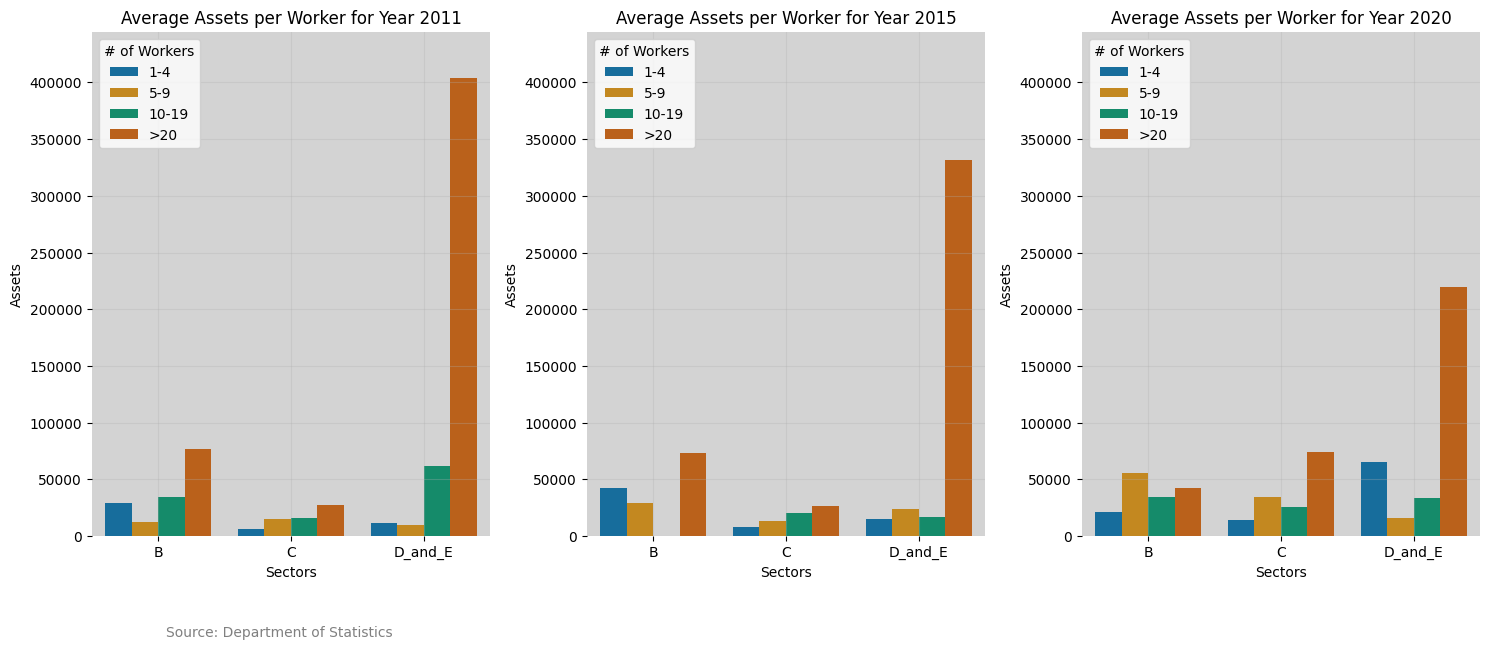

In [114]:
# Assets per worker
years_assets = average_asset_per_worker['the_year'].unique()
fig, axes = plt.subplots(1, len(years), figsize=(15, 6))


max_value = 0


for i, year in enumerate(years):
    ax = axes[i]
    year_data_assets = average_asset_per_worker[average_asset_per_worker['the_year'] == year]
    
   
    max_year_value = year_data_assets['assets_per_worker'].max()
    
    ax.set_ylim(0, max_year_value * 1.1)
    
  
    if max_year_value > max_value:
        max_value = max_year_value
    
    sns.barplot(data=year_data_assets, x='sector', y='assets_per_worker', hue='employment_bins', palette='colorblind', ax=ax)
   
    ax.set_xlabel('Sectors')
    ax.set_ylabel('Assets')
    ax.set_title(f'Average Assets per Worker for Year {year}')
   
    ax.legend(title='# of Workers', loc='upper left')
    
   
    ax.set_xticklabels(year_data['sector'].unique(), rotation=0)
    
    ax.set_facecolor('lightgray')
    
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    ax.grid(alpha=0.3)

for ax in axes:
    ax.set_ylim(0, max_value * 1.1)

plt.tight_layout()
source_text = 'Source: Department of Statistics'
plt.text(-2.3, -0.2, source_text, transform=ax.transAxes, fontsize=10, color='gray', ha='left')

plt.show()

# Estimate of total Employment with imputed weights for firms

In [115]:
df_industry['total_employment']=df_industry['employment']*df_industry['weight'].round().astype(int)
df_industry.head()

,the_year,the_main_activity,capital,foreigners_-_individuals,foreigners_-_companies,foreigners__government,male_salad_workers,females_,male_worker_owner,female_worker_owner,...,employment,sector,weight_2011,weight_2015,weight_2020,weight,salary,employment_bins,assets_per_worker,total_employment
0,2011,1071,1000.000,NaN,NaN,NaN,2.000,0.000,1.000,0.000,...,2,C,16.305,NaN,NaN,16.305,3000.000,1-4,3705.000,32
1,2011,1071,1000.000,NaN,NaN,NaN,3.000,0.000,1.000,0.000,...,3,C,16.305,NaN,NaN,16.305,1200.000,1-4,603.000,48
2,2011,1071,500.000,NaN,NaN,NaN,3.000,0.000,1.000,0.000,...,3,C,16.305,NaN,NaN,16.305,2400.000,1-4,447.667,48
3,2011,1071,2000.000,NaN,NaN,NaN,3.000,0.000,0.000,0.000,...,3,C,16.305,NaN,NaN,16.305,3600.000,1-4,456.000,48
4,2011,1071,2000.000,NaN,NaN,NaN,4.000,0.000,0.000,0.000,...,4,C,16.305,NaN,NaN,16.305,2400.000,1-4,1127.250,64


In [116]:
total_employment_sector = df_industry.groupby(['the_year', 'sector', 'employment_bins'])['total_employment'].sum().reset_index()
total_employment_sector.head(10)

,the_year,sector,employment_bins,total_employment
0,2011,B,1-4,52
1,2011,B,5-9,255
2,2011,B,10-19,153
3,2011,B,>20,10146
4,2011,C,1-4,39408
5,2011,C,5-9,11277
6,2011,C,10-19,9024
7,2011,C,>20,138500
8,2011,D_and_E,1-4,78
9,2011,D_and_E,5-9,66


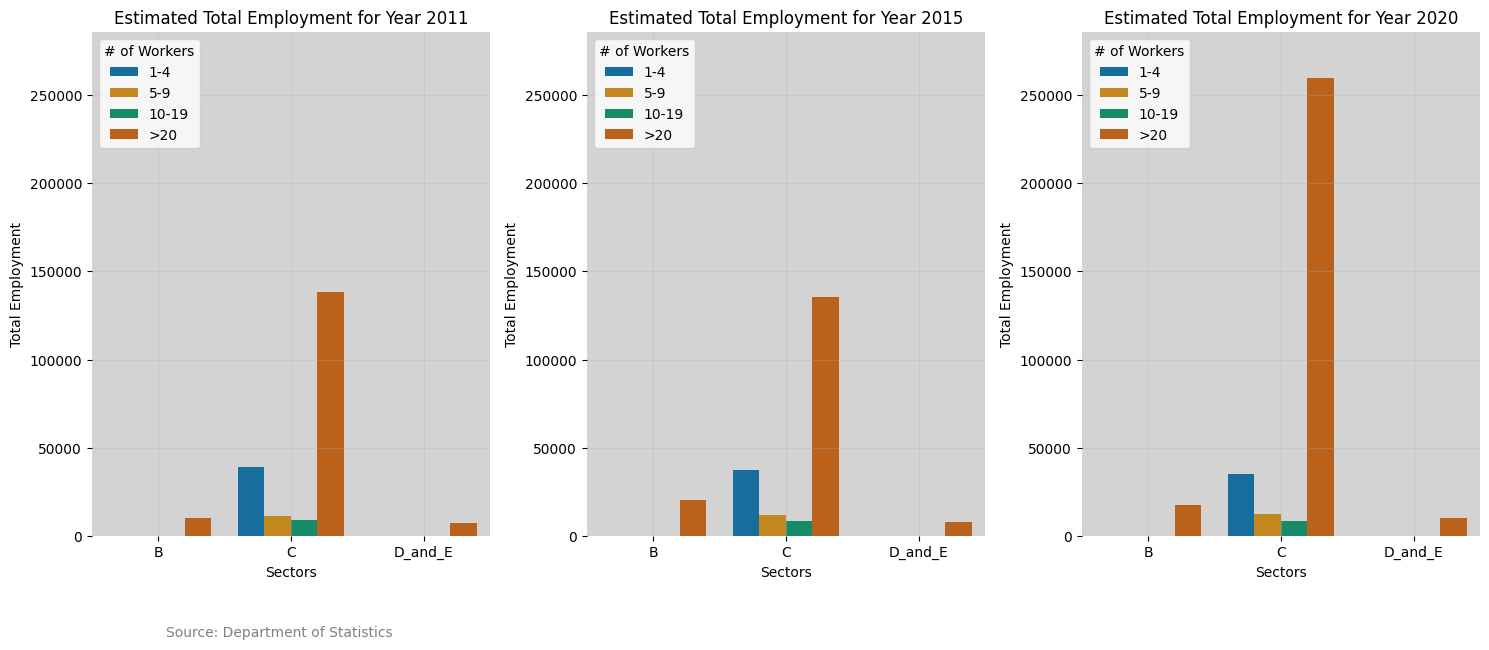

In [117]:
# Total Employment
years_empl = total_employment_sector['the_year'].unique()
fig, axes = plt.subplots(1, len(years), figsize=(15, 6))


max_value = 0


for i, year in enumerate(years):
    ax = axes[i]
    year_data_employment = total_employment_sector[total_employment_sector['the_year'] == year]
    
   
    max_year_value = year_data_employment['total_employment'].max()
    
    ax.set_ylim(0, max_year_value * 1.1)
    
  
    if max_year_value > max_value:
        max_value = max_year_value
    
    sns.barplot(data=year_data_employment, x='sector', y='total_employment', hue='employment_bins', palette='colorblind', ax=ax)
   
    ax.set_xlabel('Sectors')
    ax.set_ylabel('Total Employment')
    ax.set_title(f'Estimated Total Employment for Year {year}')
   
    ax.legend(title='# of Workers', loc='upper left')
    
   
    ax.set_xticklabels(year_data['sector'].unique(), rotation=0)
    
    ax.set_facecolor('lightgray')
    
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    ax.grid(alpha=0.3)

for ax in axes:
    ax.set_ylim(0, max_value * 1.1)

plt.tight_layout()
source_text = 'Source: Department of Statistics'
plt.text(-2.3, -0.2, source_text, transform=ax.transAxes, fontsize=10, color='gray', ha='left')

plt.show()

# Share of women in total employment

In [118]:
df_industry['female_employment'] = df_industry['females_'] * df_industry['weight']
df_industry['share_women'] = (df_industry['female_employment'] / df_industry['total_employment'])*100

In [119]:
share_women_sector = df_industry.groupby(['the_year', 'sector', 'employment_bins'])['share_women'].mean().reset_index()
share_women_sector.head(10)

,the_year,sector,employment_bins,share_women
0,2011,B,1-4,0.000
1,2011,B,5-9,0.000
2,2011,B,10-19,0.000
3,2011,B,>20,5.876
4,2011,C,1-4,5.041
5,2011,C,5-9,6.888
6,2011,C,10-19,13.544
7,2011,C,>20,11.049
8,2011,D_and_E,1-4,0.000
9,2011,D_and_E,5-9,0.000


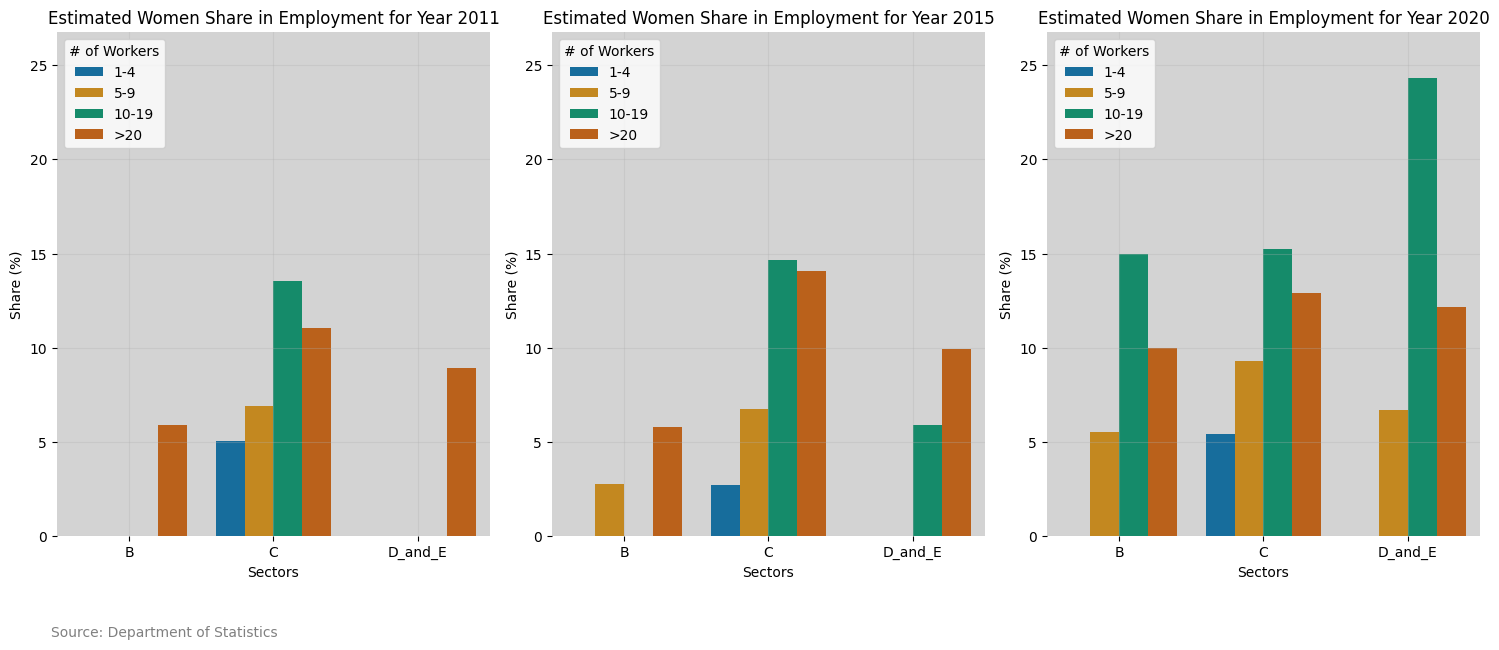

In [120]:
# Share of women in total employment
years_women = share_women_sector['the_year'].unique()
fig, axes = plt.subplots(1, len(years), figsize=(15, 6))


max_value = 0


for i, year in enumerate(years):
    ax = axes[i]
    year_data_women = share_women_sector[share_women_sector['the_year'] == year]
    
   
    max_year_value = share_women_sector['share_women'].max()
    
    ax.set_ylim(0, max_year_value * 1.1)
    
  
    if max_year_value > max_value:
        max_value = max_year_value
    
    sns.barplot(data=year_data_women, x='sector', y='share_women', hue='employment_bins', palette='colorblind', ax=ax)
   
    ax.set_xlabel('Sectors')
    ax.set_ylabel('Share (%)')
    ax.set_title(f'Estimated Women Share in Employment for Year {year}')
   
    ax.legend(title='# of Workers', loc='upper left')
    
   
    ax.set_xticklabels(year_data['sector'].unique(), rotation=0)
    
    ax.set_facecolor('lightgray')
    
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    ax.grid(alpha=0.3)

for ax in axes:
    ax.set_ylim(0, max_value * 1.1)

plt.tight_layout()
source_text = 'Source: Department of Statistics'
plt.text(-2.3, -0.2, source_text, transform=ax.transAxes, fontsize=10, color='gray', ha='left')

plt.show()

# Estimated share of firms with women in ownership

In [121]:
df_industry['dummy_women'] = df_industry['female_worker_owner'].apply(lambda x: 1 if x > 0 else 0)
df_industry.head()

,the_year,the_main_activity,capital,foreigners_-_individuals,foreigners_-_companies,foreigners__government,male_salad_workers,females_,male_worker_owner,female_worker_owner,...,weight_2015,weight_2020,weight,salary,employment_bins,assets_per_worker,total_employment,female_employment,share_women,dummy_women
0,2011,1071,1000.000,NaN,NaN,NaN,2.000,0.000,1.000,0.000,...,NaN,NaN,16.305,3000.000,1-4,3705.000,32,0.000,0.000,0
1,2011,1071,1000.000,NaN,NaN,NaN,3.000,0.000,1.000,0.000,...,NaN,NaN,16.305,1200.000,1-4,603.000,48,0.000,0.000,0
2,2011,1071,500.000,NaN,NaN,NaN,3.000,0.000,1.000,0.000,...,NaN,NaN,16.305,2400.000,1-4,447.667,48,0.000,0.000,0
3,2011,1071,2000.000,NaN,NaN,NaN,3.000,0.000,0.000,0.000,...,NaN,NaN,16.305,3600.000,1-4,456.000,48,0.000,0.000,0
4,2011,1071,2000.000,NaN,NaN,NaN,4.000,0.000,0.000,0.000,...,NaN,NaN,16.305,2400.000,1-4,1127.250,64,0.000,0.000,0


In [122]:
df_industry['firms_with_women'] = df_industry['weight'] * df_industry['dummy_women']

In [123]:
total_firms_with_women = df_industry.groupby(['the_year', 'sector', 'employment_bins'])['firms_with_women'].sum().reset_index()
total_firms_with_women.tail(10)

,the_year,sector,employment_bins,firms_with_women
26,2020,B,10-19,0.000
27,2020,B,>20,0.000
28,2020,C,1-4,110.093
29,2020,C,5-9,14.326
30,2020,C,10-19,0.000
31,2020,C,>20,4.680
32,2020,D_and_E,1-4,0.000
33,2020,D_and_E,5-9,0.000
34,2020,D_and_E,10-19,0.000
35,2020,D_and_E,>20,0.000


In [124]:
total_firms = df_industry.groupby(['the_year', 'sector', 'employment_bins'])['weight'].sum().reset_index()
total_firms.tail(10)

,the_year,sector,employment_bins,weight
26,2020,B,10-19,8.000
27,2020,B,>20,20.000
28,2020,C,1-4,17725.000
29,2020,C,5-9,1977.000
30,2020,C,10-19,685.000
31,2020,C,>20,1103.000
32,2020,D_and_E,1-4,45.000
33,2020,D_and_E,5-9,30.000
34,2020,D_and_E,10-19,12.000
35,2020,D_and_E,>20,17.000


In [125]:
columns_to_join_on = ['the_year', 'sector', 'employment_bins']
merged_df = total_firms_with_women.merge(total_firms, on=columns_to_join_on, suffixes=('_with_women', '_total'))
merged_df.rename(columns={'weight': 'total_firms'}, inplace=True)
merged_df['share_firms_women'] = (merged_df['firms_with_women'] / merged_df['total_firms'])*100
merged_df.head(10)

,the_year,sector,employment_bins,firms_with_women,total_firms,share_firms_women
0,2011,B,1-4,0.000,18.000,0.000
1,2011,B,5-9,0.000,44.000,0.000
2,2011,B,10-19,0.000,12.000,0.000
3,2011,B,>20,0.000,20.000,0.000
4,2011,C,1-4,391.310,18897.000,2.071
5,2011,C,5-9,18.949,1876.000,1.010
6,2011,C,10-19,3.945,651.000,0.606
7,2011,C,>20,6.235,809.000,0.771
8,2011,D_and_E,1-4,0.000,33.000,0.000
9,2011,D_and_E,5-9,0.000,10.000,0.000


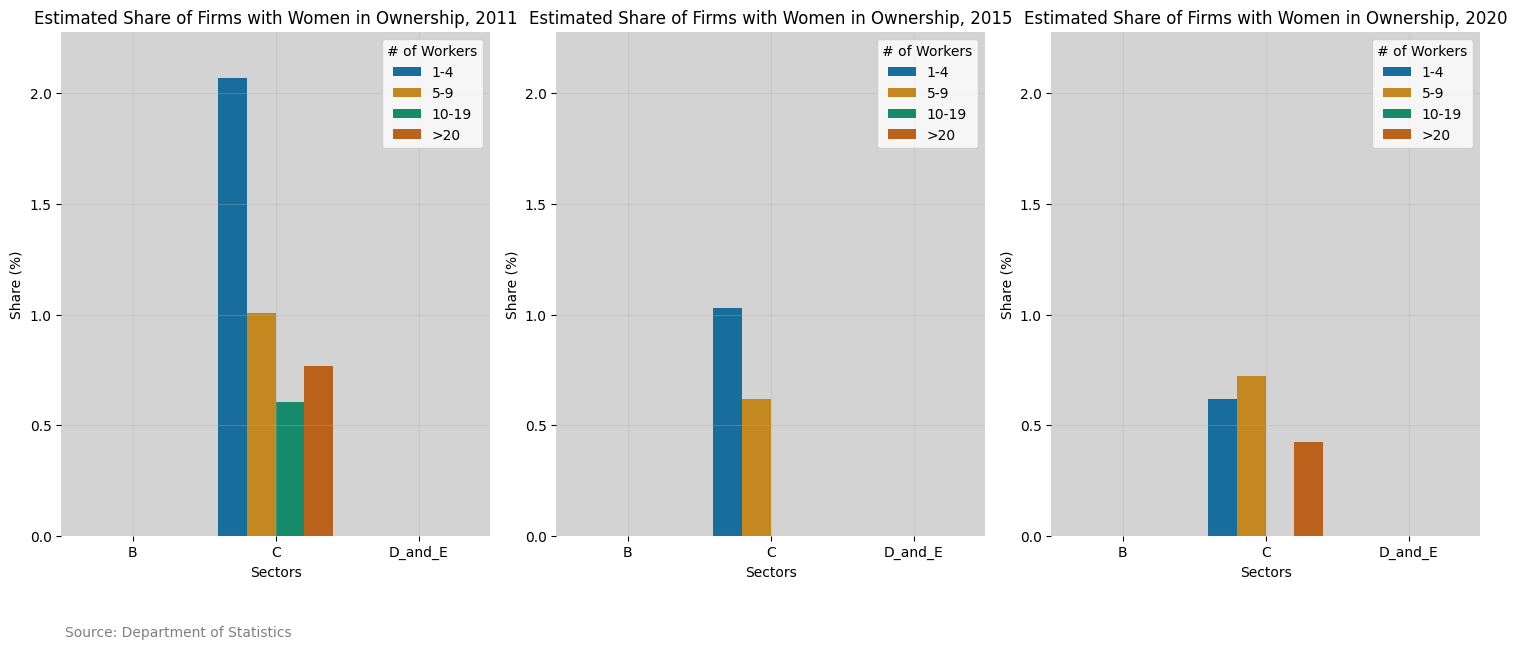

In [126]:
# Share of firms with women in ownership
years_women = merged_df['the_year'].unique()
fig, axes = plt.subplots(1, len(years), figsize=(15, 6))


max_value = 0


for i, year in enumerate(years):
    ax = axes[i]
    year_data_firm_women = merged_df[merged_df['the_year'] == year]
    
   
    max_year_value = merged_df['share_firms_women'].max()
    
    ax.set_ylim(0, max_year_value * 1.1)
    
  
    if max_year_value > max_value:
        max_value = max_year_value
    
    sns.barplot(data=year_data_firm_women, x='sector', y='share_firms_women', hue='employment_bins', palette='colorblind', ax=ax)
   
    ax.set_xlabel('Sectors')
    ax.set_ylabel('Share (%)')
    ax.set_title(f'Estimated Share of Firms with Women in Ownership, {year}')
   
    ax.legend(title='# of Workers', loc='upper right')
    
   
    ax.set_xticklabels(year_data['sector'].unique(), rotation=0)
    
    ax.set_facecolor('lightgray')
    
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    ax.grid(alpha=0.3)

for ax in axes:
    ax.set_ylim(0, max_value * 1.1)

plt.tight_layout()
source_text = 'Source: Department of Statistics'
plt.text(-2.3, -0.2, source_text, transform=ax.transAxes, fontsize=10, color='gray', ha='left')

plt.show()